In [1]:
import numpy as np
import pandas as pd

In [2]:
#read game data
games = pd.read_csv('Games.csv')
games = games[['id','week','home_team','home_conference','home_points','away_team','away_conference','away_points']]

#find winner
games['winner'] = np.where(games['home_points'] > games['away_points'], games['home_team'], games['away_team'])

#spread outcome
games['outcome'] = -(games['home_points'] - games['away_points'])
games.head()

,id,week,home_team,home_conference,home_points,away_team,away_conference,away_points,winner,outcome
0,401110723,1,Florida,SEC,24,Miami,ACC,20,Florida,-4
1,401114164,1,Hawai'i,Mountain West,45,Arizona,Pac-12,38,Hawai'i,-7
2,401119255,1,Buffalo,Mid-American,38,Robert Morris,NaN,10,Buffalo,-28
3,401119254,1,Bowling Green,Mid-American,46,Morgan State,NaN,3,Bowling Green,-43
4,401117855,1,Connecticut,American Athletic,24,Wagner,NaN,21,Connecticut,-3


In [3]:
#read recruit/talent data
recruits = pd.read_csv('Recruits.csv')
recruits = recruits.drop(['year'], axis=1)
recruits.head()

,school,talent
0,Alabama,984.96
1,Ohio State,973.56
2,Georgia,960.16
3,USC,915.56
4,LSU,906.17


In [4]:
# join recruit data to game data
games = pd.merge(games, recruits, left_on='home_team', right_on='school')
games = games.drop(['school'],axis=1)
games = games.rename(columns={'talent': 'home_talent'})
games = pd.merge(games, recruits, left_on='away_team', right_on='school')
games = games.drop(['school'],axis=1)
games = games.rename(columns={'talent': 'away_talent'})
games


,id,week,home_team,home_conference,home_points,away_team,away_conference,away_points,winner,outcome,home_talent,away_talent
0,401110723,1,Florida,SEC,24,Miami,ACC,20,Florida,-4,835.68,815.12
1,401112497,10,Florida State,ACC,10,Miami,ACC,27,Miami,17,878.07,815.12
2,401112443,2,North Carolina,ACC,28,Miami,ACC,25,North Carolina,-3,697.75,815.12
3,401112494,9,Pittsburgh,ACC,12,Miami,ACC,16,Miami,4,637.95,815.12
4,401112523,14,Duke,ACC,27,Miami,ACC,17,Duke,-10,633.24,815.12
...,...,...,...,...,...,...,...,...,...,...,...,...
835,401110791,3,Ole Miss,SEC,40,Southeastern Louisiana,NaN,29,Ole Miss,-11,717.92,178.38
836,401117861,2,Houston,American Athletic,37,Prairie View,NaN,17,Houston,-20,597.62,42.01
837,401114165,2,Arizona,Pac-12,65,Northern Arizona,NaN,41,Arizona,-24,570.07,35.00
838,401112454,3,Miami,ACC,63,Bethune-Cookman,NaN,0,Miami,-63,815.12,60.90


In [5]:
#read spread data
lines = pd.read_csv('Spreads.csv')
lines.head()

,id,homeTeam,homeScore,awayTeam,awayScore,lineProvider,overUnder,spread,formattedSpread
0,401121937,Georgia State,48,Furman,42,consensus,61.5,-6.0,Georgia State -6
1,401121938,South Alabama,37,Jackson State,14,consensus,47.0,-25.0,South Alabama -25
2,401117500,Texas State,14,Wyoming,23,Caesars,47.0,7.5,Wyoming -7.5
3,401117500,Texas State,14,Wyoming,23,consensus,47.5,7.5,Wyoming -7.5
4,401117500,Texas State,14,Wyoming,23,numberfire,48.0,7.5,Wyoming -7.5


In [6]:
#see which line provider has most data points
lines.groupby('lineProvider').count()

,id,homeTeam,homeScore,awayTeam,awayScore,overUnder,spread,formattedSpread
lineProvider,,,,,,,,
Bovada,278,278,278,278,278,278,278,278
Caesars,722,722,722,722,722,722,719,722
consensus,841,841,841,841,841,841,840,841
numberfire,731,731,731,731,731,731,731,731
teamrankings,734,734,734,734,734,734,734,734


In [7]:
#reduce spreads to only consensus spreads
lines = lines.loc[lines['lineProvider']=='consensus']
lines = lines[['id','spread','overUnder']]
lines

,id,spread,overUnder
0,401121937,-6.0,61.5
1,401121938,-25.0,47.0
3,401117500,7.5,47.5
7,401110777,-15.5,52.5
11,401112230,3.0,46.0
...,...,...,...
3289,401112096,-7.5,53.5
3291,401110724,-10.0,60.5
3295,401110726,-3.5,65.0
3299,401110727,18.5,60.5


In [8]:
#add spread to game data
games = pd.merge(games, lines, left_on='id', right_on='id')
games

,id,week,home_team,home_conference,home_points,away_team,away_conference,away_points,winner,outcome,home_talent,away_talent,spread,overUnder
0,401110723,1,Florida,SEC,24,Miami,ACC,20,Florida,-4,835.68,815.12,-7.0,46.5
1,401112497,10,Florida State,ACC,10,Miami,ACC,27,Miami,17,878.07,815.12,-3.0,49.5
2,401112443,2,North Carolina,ACC,28,Miami,ACC,25,North Carolina,-3,697.75,815.12,5.0,46.5
3,401112494,9,Pittsburgh,ACC,12,Miami,ACC,16,Miami,4,637.95,815.12,-4.5,43.0
4,401112523,14,Duke,ACC,27,Miami,ACC,17,Duke,-10,633.24,815.12,9.5,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,401110791,3,Ole Miss,SEC,40,Southeastern Louisiana,NaN,29,Ole Miss,-11,717.92,178.38,-30.5,53.0
830,401117861,2,Houston,American Athletic,37,Prairie View,NaN,17,Houston,-20,597.62,42.01,-35.0,77.5
831,401114165,2,Arizona,Pac-12,65,Northern Arizona,NaN,41,Arizona,-24,570.07,35.00,-28.0,63.5
832,401112454,3,Miami,ACC,63,Bethune-Cookman,NaN,0,Miami,-63,815.12,60.90,-41.5,56.0


In [9]:
#get drive data
drives = pd.read_csv('Drives.csv')
drives.head()

,offense,offense_conference,defense,defense_conference,game_id,id,drive_number,scoring,start_period,start_yardline,...,elapsed.minutes,elapsed.seconds,plays,yards,drive_result,is_home_offense,start_offense_score,start_defense_score,end_offense_score,end_defense_score
0,Alabama,SEC,Duke,ACC,401110720,4011107201,1,False,1,22,...,2,3,3,-3,PUNT,True,0,0,0,0
1,Duke,ACC,Alabama,SEC,401110720,4011107202,2,False,1,55,...,1,8,3,3,PUNT,False,0,0,0,0
2,Alabama,SEC,Duke,ACC,401110720,4011107203,3,False,1,17,...,0,25,2,9,FUMBLE,True,0,0,0,0
3,Duke,ACC,Alabama,SEC,401110720,4011107204,4,False,1,26,...,2,56,7,19,DOWNS,False,0,0,0,0
4,Alabama,SEC,Duke,ACC,401110720,4011107205,5,False,1,7,...,5,3,12,62,MISSED FG,True,0,0,0,0


In [10]:
#get advanced metric data
metrics = pd.read_csv('Advanced Metrics.csv')
metrics.head()

,gameId,week,team,opponent,offense.plays,offense.drives,offense.ppa,offense.totalPPA,offense.successRate,offense.explosiveness,...,defense.passingDowns.successRate,defense.passingDowns.explosiveness,defense.rushingPlays.ppa,defense.rushingPlays.totalPPA,defense.rushingPlays.successRate,defense.rushingPlays.explosiveness,defense.passingPlays.ppa,defense.passingPlays.totalPPA,defense.passingPlays.successRate,defense.passingPlays.explosiveness
0,401110720,1,Alabama,Duke,73,13,0.417830,30.501593,0.561644,1.222213,...,0.157895,1.923464,-0.306564,-8.890362,0.206897,0.798370,-0.208687,-4.382425,0.190476,2.264790
1,401110720,1,Duke,Alabama,51,11,-0.276693,-14.111323,0.215686,1.182804,...,0.500000,1.240101,0.036218,1.376287,0.447368,0.998132,0.832152,29.125306,0.685714,1.380936
2,401110721,1,Arkansas,Portland State,77,12,0.108314,8.340185,0.428571,1.117680,...,0.214286,2.548093,0.052289,1.098064,0.190476,1.923748,-0.133505,-4.939677,0.243243,1.648162
3,401110721,1,Portland State,Arkansas,60,11,-0.037699,-2.261956,0.250000,1.607207,...,0.304348,1.753551,0.210821,8.432825,0.450000,1.002722,0.036103,1.263607,0.371429,1.553130
4,401110722,1,Auburn,Oregon,75,14,-0.002817,-0.211257,0.426667,1.052530,...,0.333333,1.659432,-0.040529,-1.094272,0.296296,1.054867,0.214972,8.383896,0.358974,1.351757


<b> Get weekly stats

In [11]:
#week 1
wk1 = pd.read_csv('Week 1.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk1['week']=1

#week 2
wk2 = pd.read_csv('Week 2.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk2['week']=2

#week 3
wk3 = pd.read_csv('Week 3.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk3['week']=3

#week 4
wk4 = pd.read_csv('Week 4.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk4['week']=4

#week 5
wk5 = pd.read_csv('Week 5.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk5['week']=5

#week 6
wk6 = pd.read_csv('Week 6.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk6['week']=6

#week 7
wk7 = pd.read_csv('Week 7.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk7['week']=7

#week 8
wk8 = pd.read_csv('Week 8.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk8['week']=8

#week 9
wk9 = pd.read_csv('Week 9.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk9['week']=9

#week 10
wk10 = pd.read_csv('Week 10.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk10['week']=10

#week 11
wk11 = pd.read_csv('Week 11.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk11['week']=11

#week 12
wk12 = pd.read_csv('Week 12.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk12['week']=12

#week 13
wk13 = pd.read_csv('Week 13.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk13['week']=13

#week 14
wk14 = pd.read_csv('Week 14.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk14['week']=14

#week 15
wk15 = pd.read_csv('Week 15.csv').drop(['game_id','conference','homeAway','points'], axis=1).pivot(index='school', columns='stat_category', values='stat')
wk15['week']=15

all_weeks = pd.concat([wk1, wk2, wk3, wk4, wk5, wk6, wk7, wk8, wk9, wk10, wk11, wk12, wk13, wk14, wk15])
all_weeks

,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,interceptions,kickReturnTDs,...,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt,week
school,,,,,,,,,,,,,,,,,,,,,
Abilene Christian,24-35,0,20,0-0,1,0,0,0,0,0,...,84,6,9-17,4,5-35,456,1,7.8,5.1,1
Air Force,1-1,0,24,1-1,1,2,0,7,0,NaN,...,18,6,4-7,6,2-25,464,1,41.0,6.5,1
Akron,12-28,0,16,0-0,1,0,NaN,NaN,1,0,...,43,3,3-13,2,5-36,192,2,4.6,1.7,1
Alabama,30-36,0,30,2-2,1,2,0,0,0,0,...,48,4,6-12,2,8-88,512,1,10.2,3.5,1
Alabama State,19-32,0,12,1-3,1,4,NaN,NaN,1,NaN,...,86,8,3-15,4,6-48,260,2,3.6,4.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Oregon,14-26,0,19,1-1,0,0,0,1,0,0,...,30,9,4-14,NaN,12-95,432,0,7.4,5.8,15
UAB,8-19,0,14,0-1,0,0,0,0,2,0,...,32,1,2-13,NaN,11-83,223,2,4.4,3.5,15
Utah,17-29,0,18,0-4,0,0,NaN,NaN,2,0,...,33,3,4-14,NaN,8-48,309,2,6.7,3.3,15


In [12]:
tiny=all_weeks[['totalYards','rushingYards','netPassingYards','yardsPerPass','yardsPerRushAttempt','firstDowns','turnovers','interceptions','fumblesLost','defensiveTDs','tacklesForLoss','sacks','qbHurries','kickReturnYards','kickReturnTDs','week']]
tiny

,totalYards,rushingYards,netPassingYards,yardsPerPass,yardsPerRushAttempt,firstDowns,turnovers,interceptions,fumblesLost,defensiveTDs,tacklesForLoss,sacks,qbHurries,kickReturnYards,kickReturnTDs,week
school,,,,,,,,,,,,,,,,
Abilene Christian,456,183,273,7.8,5.1,20,1,0,1,0,6,2,6,72,0,1
Air Force,464,423,41,41.0,6.5,24,1,0,1,0,6,4,8,NaN,NaN,1
Akron,192,64,128,4.6,1.7,16,2,1,1,0,3,4,0,43,0,1
Alabama,512,145,367,10.2,3.5,30,1,0,1,0,4,1,0,22,0,1
Alabama State,260,145,115,3.6,4.5,12,2,1,1,0,8,0,2,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Oregon,432,239,193,7.4,5.8,19,0,0,0,0,9,6,1,37,0,15
UAB,223,139,84,4.4,3.5,14,2,2,0,0,1,0,5,18,0,15
Utah,309,116,193,6.7,3.3,18,2,2,0,0,3,1,4,52,0,15


In [13]:
games

,id,week,home_team,home_conference,home_points,away_team,away_conference,away_points,winner,outcome,home_talent,away_talent,spread,overUnder
0,401110723,1,Florida,SEC,24,Miami,ACC,20,Florida,-4,835.68,815.12,-7.0,46.5
1,401112497,10,Florida State,ACC,10,Miami,ACC,27,Miami,17,878.07,815.12,-3.0,49.5
2,401112443,2,North Carolina,ACC,28,Miami,ACC,25,North Carolina,-3,697.75,815.12,5.0,46.5
3,401112494,9,Pittsburgh,ACC,12,Miami,ACC,16,Miami,4,637.95,815.12,-4.5,43.0
4,401112523,14,Duke,ACC,27,Miami,ACC,17,Duke,-10,633.24,815.12,9.5,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,401110791,3,Ole Miss,SEC,40,Southeastern Louisiana,NaN,29,Ole Miss,-11,717.92,178.38,-30.5,53.0
830,401117861,2,Houston,American Athletic,37,Prairie View,NaN,17,Houston,-20,597.62,42.01,-35.0,77.5
831,401114165,2,Arizona,Pac-12,65,Northern Arizona,NaN,41,Arizona,-24,570.07,35.00,-28.0,63.5
832,401112454,3,Miami,ACC,63,Bethune-Cookman,NaN,0,Miami,-63,815.12,60.90,-41.5,56.0


In [14]:
home_df=games[['id','week','home_team','home_points','home_talent', 'outcome','spread','overUnder','away_team']]
home_df=home_df.rename(columns={'home_team': 'team','home_points': 'points','home_talent': 'talent','away_team':'opponent'})
home_df['home']=1
home_df['win']=np.where(home_df['outcome'] < 0, 1, 0)
home_df['cover']=np.where(home_df['outcome'] < home_df['spread'], 1, 0)
home_df

away_df=games[['id','week','away_team','away_points','away_talent','outcome','spread','overUnder','home_team']]
away_df=away_df.rename(columns={'away_team': 'team','away_points': 'points','away_talent': 'talent','home_team':'opponent'})
away_df['home']=0
away_df['win']=np.where(home_df['outcome'] > 0, 1, 0)
away_df['cover']=np.where(away_df['outcome'] > away_df['spread'], 1, 0)
away_df

all_teams=pd.concat([home_df,away_df])
all_teams
all_teams.sort_values(by=['team','week']).head(25)

,id,week,team,points,talent,outcome,spread,overUnder,opponent,home,win,cover
797,401114241,1,Abilene Christian,31,46.84,-20,-23.0,58.5,North Texas,0,0,1
798,401110860,13,Abilene Christian,7,46.84,-38,-37.0,57.0,Mississippi State,0,0,0
48,401114185,3,Air Force,30,151.86,7,-3.0,58.5,Colorado,0,1,1
51,401117506,4,Air Force,19,151.86,-11,-7.5,53.5,Boise State,0,0,0
62,401117512,5,Air Force,41,151.86,-17,-19.5,58.0,San José State,1,1,0
49,401117516,6,Air Force,25,151.86,-9,3.0,46.5,Navy,0,0,0
55,401117520,7,Air Force,43,151.86,-19,-3.0,50.5,Fresno State,1,1,1
47,401117525,8,Air Force,56,151.86,30,4.0,66.0,Hawai'i,0,1,1
504,401117530,9,Air Force,31,151.86,-24,-3.5,60.0,Utah State,1,1,1
73,401114331,10,Air Force,17,151.86,-4,-17.0,45.0,Army,1,1,0


In [15]:
#join team stats and games by week
all_stats = pd.merge(all_teams, tiny,  how='left', left_on=['team','week'], right_on = ['school','week'])

#fill NaN with 0
all_stats['kickReturnYards'] = all_stats['kickReturnYards'].fillna(0)
all_stats['kickReturnTDs'] = all_stats['kickReturnTDs'].fillna(0)

#drop 2 rows with NA values
all_stats = all_stats.dropna()

all_stats

,id,week,team,points,talent,outcome,spread,overUnder,opponent,home,...,firstDowns,turnovers,interceptions,fumblesLost,defensiveTDs,tacklesForLoss,sacks,qbHurries,kickReturnYards,kickReturnTDs
0,401110723,1,Florida,24,835.68,-4,-7.0,46.5,Miami,1,...,17,4,2,2,0,16,20,5,44,0
1,401112497,10,Florida State,10,878.07,17,-3.0,49.5,Miami,1,...,15,2,2,0,0,5,2,5,23,0
2,401112443,2,North Carolina,28,697.75,-3,5.0,46.5,Miami,1,...,22,0,0,0,0,8,4,14,0,0
3,401112494,9,Pittsburgh,12,637.95,4,-4.5,43.0,Miami,1,...,16,3,2,1,0,2.5,2,5,13,0
4,401112523,14,Duke,27,633.24,-10,9.5,44.0,Miami,1,...,14,1,0,1,0,11,9,6,112,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,401110791,3,Southeastern Louisiana,29,178.38,-11,-30.5,53.0,Ole Miss,0,...,20,4,3,1,0,11,3,0,152,0
1664,401117861,2,Prairie View,17,42.01,-20,-35.0,77.5,Houston,0,...,16,1,1,0,0,9.5,4,0,28,0
1665,401114165,2,Northern Arizona,41,35.00,-24,-28.0,63.5,Arizona,0,...,26,2,2,0,0,9,1,0,28,0
1666,401112454,3,Bethune-Cookman,0,60.90,-63,-41.5,56.0,Miami,0,...,4,1,0,1,0,6,0,0,103,0


In [54]:
path=r'C:/Users/loosm/DSC-630 Predictive Analytics/Term Project/all_stats.csv'
all_stats.to_csv(path,index=False)

In [16]:
#create 4 week moving averages for stats, shifted to excluding current week
all_stats['test'] = 1
all_stats['wins'] = all_stats.sort_values(by=['week']).groupby('team')['win'].transform(lambda x: x.cumsum().shift(1))
all_stats['games'] = all_stats.sort_values(by=['week']).groupby('team')['test'].transform(lambda x: x.cumsum().shift(1))
all_stats['win_pct'] = all_stats['wins'] / all_stats['games']
all_stats['points_MA'] = all_stats.sort_values(by=['week']).groupby('team')['points'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['MOV_MA'] = -1*(all_stats.sort_values(by=['week']).groupby('team')['outcome'].transform(lambda x: x.rolling(4, 1).mean().shift(1)))
all_stats['totalYards_MA'] = all_stats.sort_values(by=['week']).groupby('team')['totalYards'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['rushYards_MA'] = all_stats.sort_values(by=['week']).groupby('team')['rushingYards'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['passYards_MA'] = all_stats.sort_values(by=['week']).groupby('team')['netPassingYards'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['YardsPerPass_MA'] = all_stats.sort_values(by=['week']).groupby('team')['yardsPerPass'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['YardsPerRush_MA'] = all_stats.sort_values(by=['week']).groupby('team')['yardsPerRushAttempt'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['firstDowns_MA'] = all_stats.sort_values(by=['week']).groupby('team')['firstDowns'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['turnovers_MA'] = all_stats.sort_values(by=['week']).groupby('team')['turnovers'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['interceptions_MA'] = all_stats.sort_values(by=['week']).groupby('team')['interceptions'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['fumbles_MA'] = all_stats.sort_values(by=['week']).groupby('team')['fumblesLost'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['defensiveTDs_MA'] = all_stats.sort_values(by=['week']).groupby('team')['defensiveTDs'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['TFLs_MA'] = all_stats.sort_values(by=['week']).groupby('team')['tacklesForLoss'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['qbHurries_MA'] = all_stats.sort_values(by=['week']).groupby('team')['qbHurries'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['sacks_MA'] = all_stats.sort_values(by=['week']).groupby('team')['sacks'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['kickReturnYards_MA'] = all_stats.sort_values(by=['week']).groupby('team')['kickReturnYards'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
all_stats['kickReturnTDs_MA'] = all_stats.sort_values(by=['week']).groupby('team')['kickReturnTDs'].transform(lambda x: x.rolling(4, 1).mean().shift(1))

all_stats.sort_values(by=['team','week']).head(10)

,id,week,team,points,talent,outcome,spread,overUnder,opponent,home,...,firstDowns_MA,turnovers_MA,interceptions_MA,fumbles_MA,defensiveTDs_MA,TFLs_MA,qbHurries_MA,sacks_MA,kickReturnYards_MA,kickReturnTDs_MA
1631,401114241,1,Abilene Christian,31,46.84,-20,-23.0,58.5,North Texas,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632,401110860,13,Abilene Christian,7,46.84,-38,-37.0,57.0,Mississippi State,0,...,20.000000,1.00,0.000000,1.000000,0.0,6.000000,6.000000,2.00,72.000000,0.0
882,401114185,3,Air Force,30,151.86,7,-3.0,58.5,Colorado,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,401117506,4,Air Force,19,151.86,-11,-7.5,53.5,Boise State,0,...,22.000000,3.00,1.000000,2.000000,0.0,4.000000,3.000000,4.00,0.000000,0.0
62,401117512,5,Air Force,41,151.86,-17,-19.5,58.0,San José State,1,...,20.500000,2.00,1.000000,1.000000,0.0,7.000000,1.500000,2.50,0.000000,0.0
883,401117516,6,Air Force,25,151.86,-9,3.0,46.5,Navy,0,...,21.666667,2.00,0.666667,1.333333,0.0,6.666667,3.666667,2.00,3.666667,0.0
55,401117520,7,Air Force,43,151.86,-19,-3.0,50.5,Fresno State,1,...,20.000000,2.25,0.750000,1.500000,0.0,7.500000,2.750000,1.75,7.250000,0.0
881,401117525,8,Air Force,56,151.86,30,4.0,66.0,Hawai'i,0,...,21.500000,1.50,0.500000,1.000000,0.5,7.500000,2.500000,1.00,7.250000,0.0
504,401117530,9,Air Force,31,151.86,-24,-3.5,60.0,Utah State,1,...,22.250000,1.25,0.250000,1.000000,1.0,8.000000,2.750000,1.75,7.500000,0.0
73,401114331,10,Air Force,17,151.86,-4,-17.0,45.0,Army,1,...,23.750000,1.25,0.250000,1.000000,1.0,7.250000,1.750000,2.00,10.000000,0.0


In [40]:
path=r'C:/Users/loosm/DSC-630 Predictive Analytics/Term Project/stats_by_team.csv'
all_stats.to_csv(path,index=False)

In [17]:
all_stats

,id,week,team,points,talent,outcome,spread,overUnder,opponent,home,...,firstDowns_MA,turnovers_MA,interceptions_MA,fumbles_MA,defensiveTDs_MA,TFLs_MA,qbHurries_MA,sacks_MA,kickReturnYards_MA,kickReturnTDs_MA
0,401110723,1,Florida,24,835.68,-4,-7.0,46.5,Miami,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,401112497,10,Florida State,10,878.07,17,-3.0,49.5,Miami,1,...,21.5,1.5,1.00,0.50,0.00,8.00,3.0,2.75,33.50,0.0
2,401112443,2,North Carolina,28,697.75,-3,5.0,46.5,Miami,1,...,23.0,1.0,0.00,1.00,0.00,7.00,8.0,3.00,13.00,0.0
3,401112494,9,Pittsburgh,12,637.95,4,-4.5,43.0,Miami,1,...,24.5,2.0,0.75,1.25,0.75,14.00,11.0,6.75,35.25,0.0
4,401112523,14,Duke,27,633.24,-10,9.5,44.0,Miami,1,...,16.0,3.0,1.50,1.50,0.50,5.75,4.0,1.75,121.00,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,401110791,3,Southeastern Louisiana,29,178.38,-11,-30.5,53.0,Ole Miss,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1664,401117861,2,Prairie View,17,42.01,-20,-35.0,77.5,Houston,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665,401114165,2,Northern Arizona,41,35.00,-24,-28.0,63.5,Arizona,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1666,401112454,3,Bethune-Cookman,0,60.90,-63,-41.5,56.0,Miami,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Joining opponent and opponent's opponent's Moving Averages 

In [18]:
#join current week's opponent's moving averages
opp_stats = pd.merge(all_stats, all_stats,  how='left', left_on=['id','week','opponent'], right_on = ['id','week','team'], suffixes=('','_opp'))
opp_stats

,id,week,team,points,talent,outcome,spread,overUnder,opponent,home,...,firstDowns_MA_opp,turnovers_MA_opp,interceptions_MA_opp,fumbles_MA_opp,defensiveTDs_MA_opp,TFLs_MA_opp,qbHurries_MA_opp,sacks_MA_opp,kickReturnYards_MA_opp,kickReturnTDs_MA_opp
0,401110723,1,Florida,24,835.68,-4,-7.0,46.5,Miami,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,401112497,10,Florida State,10,878.07,17,-3.0,49.5,Miami,1,...,18.500000,1.750000,1.250000,0.500000,0.0,10.50,4.75,4.250000,24.750000,0.0
2,401112443,2,North Carolina,28,697.75,-3,5.0,46.5,Miami,1,...,20.000000,1.000000,0.000000,1.000000,0.0,6.00,3.00,2.000000,32.000000,0.0
3,401112494,9,Pittsburgh,12,637.95,4,-4.5,43.0,Miami,1,...,19.500000,1.750000,1.000000,0.750000,0.0,13.25,5.25,4.250000,23.250000,0.0
4,401112523,14,Duke,27,633.24,-10,9.5,44.0,Miami,1,...,18.000000,1.250000,1.000000,0.250000,0.0,10.00,3.00,4.000000,55.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,401110791,3,Southeastern Louisiana,29,178.38,-11,-30.5,53.0,Ole Miss,0,...,18.000000,1.500000,0.500000,1.000000,0.0,14.00,6.50,5.000000,25.000000,0.0
1660,401117861,2,Prairie View,17,42.01,-20,-35.0,77.5,Houston,0,...,24.000000,0.000000,0.000000,0.000000,0.0,5.00,0.00,0.000000,61.000000,0.0
1661,401114165,2,Northern Arizona,41,35.00,-24,-28.0,63.5,Arizona,0,...,27.000000,2.000000,2.000000,0.000000,0.0,3.00,1.00,2.000000,44.000000,0.0
1662,401112454,3,Bethune-Cookman,0,60.90,-63,-41.5,56.0,Miami,0,...,23.500000,0.500000,0.000000,0.500000,0.0,13.00,2.50,5.000000,23.500000,0.0


In [19]:
#create MAs for team's "defensive" stats (opp_points_MA=points team has given up over previous 4 weeks)
#these stats are the teams previous 4 opponents moving average

#create 4 week moving averages for stats, shifted to excluding current week
opp_stats['def_points_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['points_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_MOV_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['MOV_MA_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_totalYards_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['totalYards_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_rushYards_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['rushingYards_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_passYards_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['netPassingYards_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_YardsPerRush_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['yardsPerRushAttempt_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_YardsPerPass_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['yardsPerPass_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_firstDowns_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['firstDowns_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_turnovers_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['turnovers_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_interceptions_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['interceptions_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_fumbles_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['fumblesLost_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_defensiveTDs_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['defensiveTDs_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_sacks_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['sacks_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_TFLs_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['tacklesForLoss_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_qbHurries_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['qbHurries_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_kickReturnYards_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['kickReturnYards_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))
opp_stats['def_kickReturnTDs_MA'] = opp_stats.sort_values(by=['week']).groupby('team')['kickReturnTDs_opp'].transform(lambda x: x.rolling(4, 1).mean().shift(1))


opp_stats

,id,week,team,points,talent,outcome,spread,overUnder,opponent,home,...,def_firstDowns_MA,def_turnovers_MA,def_interceptions_MA,def_fumbles_MA,def_defensiveTDs_MA,def_sacks_MA,def_TFLs_MA,def_qbHurries_MA,def_kickReturnYards_MA,def_kickReturnTDs_MA
0,401110723,1,Florida,24,835.68,-4,-7.0,46.5,Miami,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,401112497,10,Florida State,10,878.07,17,-3.0,49.5,Miami,1,...,24.00,1.00,0.25,0.75,0.50,4.75,9.50,5.25,4.00,0.0
2,401112443,2,North Carolina,28,697.75,-3,5.0,46.5,Miami,1,...,15.00,2.00,2.00,0.00,0.00,6.00,6.00,2.00,100.00,0.0
3,401112494,9,Pittsburgh,12,637.95,4,-4.5,43.0,Miami,1,...,18.75,2.00,1.25,0.75,0.25,2.00,6.50,9.00,33.75,0.0
4,401112523,14,Duke,27,633.24,-10,9.5,44.0,Miami,1,...,21.25,1.25,1.00,0.25,0.25,5.00,7.25,3.25,31.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,401110791,3,Southeastern Louisiana,29,178.38,-11,-30.5,53.0,Ole Miss,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1660,401117861,2,Prairie View,17,42.01,-20,-35.0,77.5,Houston,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1661,401114165,2,Northern Arizona,41,35.00,-24,-28.0,63.5,Arizona,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1662,401112454,3,Bethune-Cookman,0,60.90,-63,-41.5,56.0,Miami,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#create table to store opponent's opponent's averages (opp_points_MA_opp_opp=points opponent has given up over previous 4 weeks))
#these stats are opponent's previous 4 opponent's moving average

temp = opp_stats[['id','week','team','opponent','def_points_MA','def_MOV_MA','def_totalYards_MA','def_rushYards_MA','def_passYards_MA',
                  'def_YardsPerRush_MA','def_YardsPerPass_MA','def_firstDowns_MA','def_turnovers_MA','def_interceptions_MA',
                  'def_fumbles_MA','def_defensiveTDs_MA','def_sacks_MA','def_TFLs_MA','def_qbHurries_MA','def_kickReturnYards_MA',
                 'def_kickReturnTDs_MA']]
temp[temp['team']=='Auburn']

,id,week,team,opponent,def_points_MA,def_MOV_MA,def_totalYards_MA,def_rushYards_MA,def_passYards_MA,def_YardsPerRush_MA,...,def_firstDowns_MA,def_turnovers_MA,def_interceptions_MA,def_fumbles_MA,def_defensiveTDs_MA,def_sacks_MA,def_TFLs_MA,def_qbHurries_MA,def_kickReturnYards_MA,def_kickReturnTDs_MA
20,401110849,12,Auburn,Georgia,17.750000,11.000000,351.50,134.500000,217.000000,3.500,...,19.75,2.500000,0.750000,1.750000,0.0,2.00,6.000000,2.75,30.750000,0.0
306,401110865,14,Auburn,Alabama,14.500000,7.833333,284.75,136.500000,148.250000,3.425,...,18.25,1.500000,0.750000,0.750000,0.0,1.50,6.000000,1.00,28.500000,0.0
313,401110808,5,Auburn,Mississippi State,15.750000,28.888889,316.75,89.500000,227.250000,3.075,...,17.75,0.750000,0.250000,0.500000,0.0,1.25,9.500000,3.25,21.000000,0.0
390,401110787,3,Auburn,Kent State,13.500000,28.000000,277.50,105.000000,172.500000,3.350,...,14.50,1.000000,0.500000,0.500000,0.0,0.50,6.000000,4.50,28.500000,0.0
417,401110722,1,Auburn,Oregon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,401110774,2,Auburn,Tulane,21.000000,NaN,332.00,90.000000,242.000000,2.700,...,17.00,1.000000,0.000000,1.000000,0.0,1.00,7.000000,7.00,57.000000,0.0
591,401110837,10,Auburn,Ole Miss,20.000000,8.750000,368.50,122.250000,246.250000,3.275,...,21.00,3.000000,0.750000,2.250000,0.0,2.25,6.750000,3.25,17.750000,0.0
801,401110856,13,Auburn,Samford,17.000000,6.750000,314.75,136.750000,178.000000,3.475,...,19.00,1.500000,0.750000,0.750000,0.0,2.00,5.500000,1.50,35.750000,0.0
845,401110812,6,Auburn,Florida,16.250000,22.979167,317.25,96.500000,220.750000,3.175,...,18.75,1.000000,0.250000,0.750000,0.0,1.50,9.250000,2.00,10.750000,0.0
846,401110804,4,Auburn,Texas A&M,14.333333,25.500000,292.00,100.666667,191.333333,3.200,...,16.00,0.666667,0.333333,0.333333,0.0,1.00,7.333333,3.00,21.333333,0.0


In [21]:
opp_stats = opp_stats.merge(temp,  how='left', left_on=['id','week','opponent'], right_on = ['id','week','team'], suffixes=('','_opp'))
opp_stats

,id,week,team,points,talent,outcome,spread,overUnder,opponent,home,...,def_firstDowns_MA_opp,def_turnovers_MA_opp,def_interceptions_MA_opp,def_fumbles_MA_opp,def_defensiveTDs_MA_opp,def_sacks_MA_opp,def_TFLs_MA_opp,def_qbHurries_MA_opp,def_kickReturnYards_MA_opp,def_kickReturnTDs_MA_opp
0,401110723,1,Florida,24,835.68,-4,-7.0,46.5,Miami,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,401112497,10,Florida State,10,878.07,17,-3.0,49.5,Miami,1,...,18.000000,1.250000,0.500000,0.750000,0.0,6.250000,6.625000,5.500000,40.250000,0.0
2,401112443,2,North Carolina,28,697.75,-3,5.0,46.5,Miami,1,...,17.000000,4.000000,2.000000,2.000000,0.0,20.000000,16.000000,5.000000,44.000000,0.0
3,401112494,9,Pittsburgh,12,637.95,4,-4.5,43.0,Miami,1,...,19.250000,1.250000,0.250000,1.000000,0.0,7.750000,8.250000,5.000000,54.500000,0.0
4,401112523,14,Duke,27,633.24,-10,9.5,44.0,Miami,1,...,16.500000,2.000000,1.500000,0.500000,0.0,1.375000,3.750000,4.000000,48.250000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,401110791,3,Southeastern Louisiana,29,178.38,-11,-30.5,53.0,Ole Miss,0,...,20.000000,1.000000,0.500000,0.500000,0.0,2.500000,9.000000,2.500000,63.500000,0.0
1660,401117861,2,Prairie View,17,42.01,-20,-35.0,77.5,Houston,0,...,30.000000,2.000000,0.000000,2.000000,0.0,6.000000,8.000000,8.000000,37.000000,0.0
1661,401114165,2,Northern Arizona,41,35.00,-24,-28.0,63.5,Arizona,0,...,31.000000,6.000000,4.000000,2.000000,0.0,4.000000,6.000000,4.000000,65.000000,0.0
1662,401112454,3,Bethune-Cookman,0,60.90,-63,-41.5,56.0,Miami,0,...,19.500000,2.000000,1.000000,1.000000,0.0,12.000000,12.000000,9.500000,22.000000,0.0


In [24]:
path=r'C:/Users/loosm/DSC-630 Predictive Analytics/Term Project/final_stats.csv'
opp_stats.to_csv(path,index=False)

In [ ]:
#remove duplicate games

<b>Scratch Work, for now

In [22]:
print(opp_stats.columns)

Index(['id', 'week', 'team', 'points', 'talent', 'outcome', 'spread',
       'opponent', 'home', 'win',
       ...
       'def_firstDowns_MA_opp', 'def_turnovers_MA_opp',
       'def_interceptions_MA_opp', 'def_fumbles_MA_opp',
       'def_defensiveTDs_MA_opp', 'def_sacks_MA_opp', 'def_TFLs_MA_opp',
       'def_qbHurries_MA_opp', 'def_kickReturnYards_MA_opp',
       'def_kickReturnTDs_MA_opp'],
      dtype='object', length=128)


In [22]:
small=opp_stats[['week','points','spread','overUnder','outcome','home','win_pct','points_MA','MOV_MA','totalYards_MA','rushYards_MA',
                 'passYards_MA','YardsPerPass_MA','YardsPerRush_MA','firstDowns_MA','turnovers_MA',
                'win_pct_opp','def_points_MA_opp','def_MOV_MA_opp','def_totalYards_MA_opp','def_rushYards_MA_opp',
                 'def_passYards_MA_opp','def_YardsPerPass_MA_opp','def_YardsPerRush_MA_opp','def_firstDowns_MA_opp',
                 'def_turnovers_MA_opp','points_MA_opp','MOV_MA_opp','totalYards_MA_opp','rushYards_MA_opp',
                 'passYards_MA_opp','YardsPerPass_MA_opp','YardsPerRush_MA_opp','firstDowns_MA_opp','turnovers_MA_opp',
                'def_points_MA','def_MOV_MA','def_totalYards_MA','def_rushYards_MA',
                 'def_passYards_MA','def_YardsPerPass_MA','def_YardsPerRush_MA','def_firstDowns_MA',
                 'def_turnovers_MA','points_opp']]
small = small[small['week']>=5]

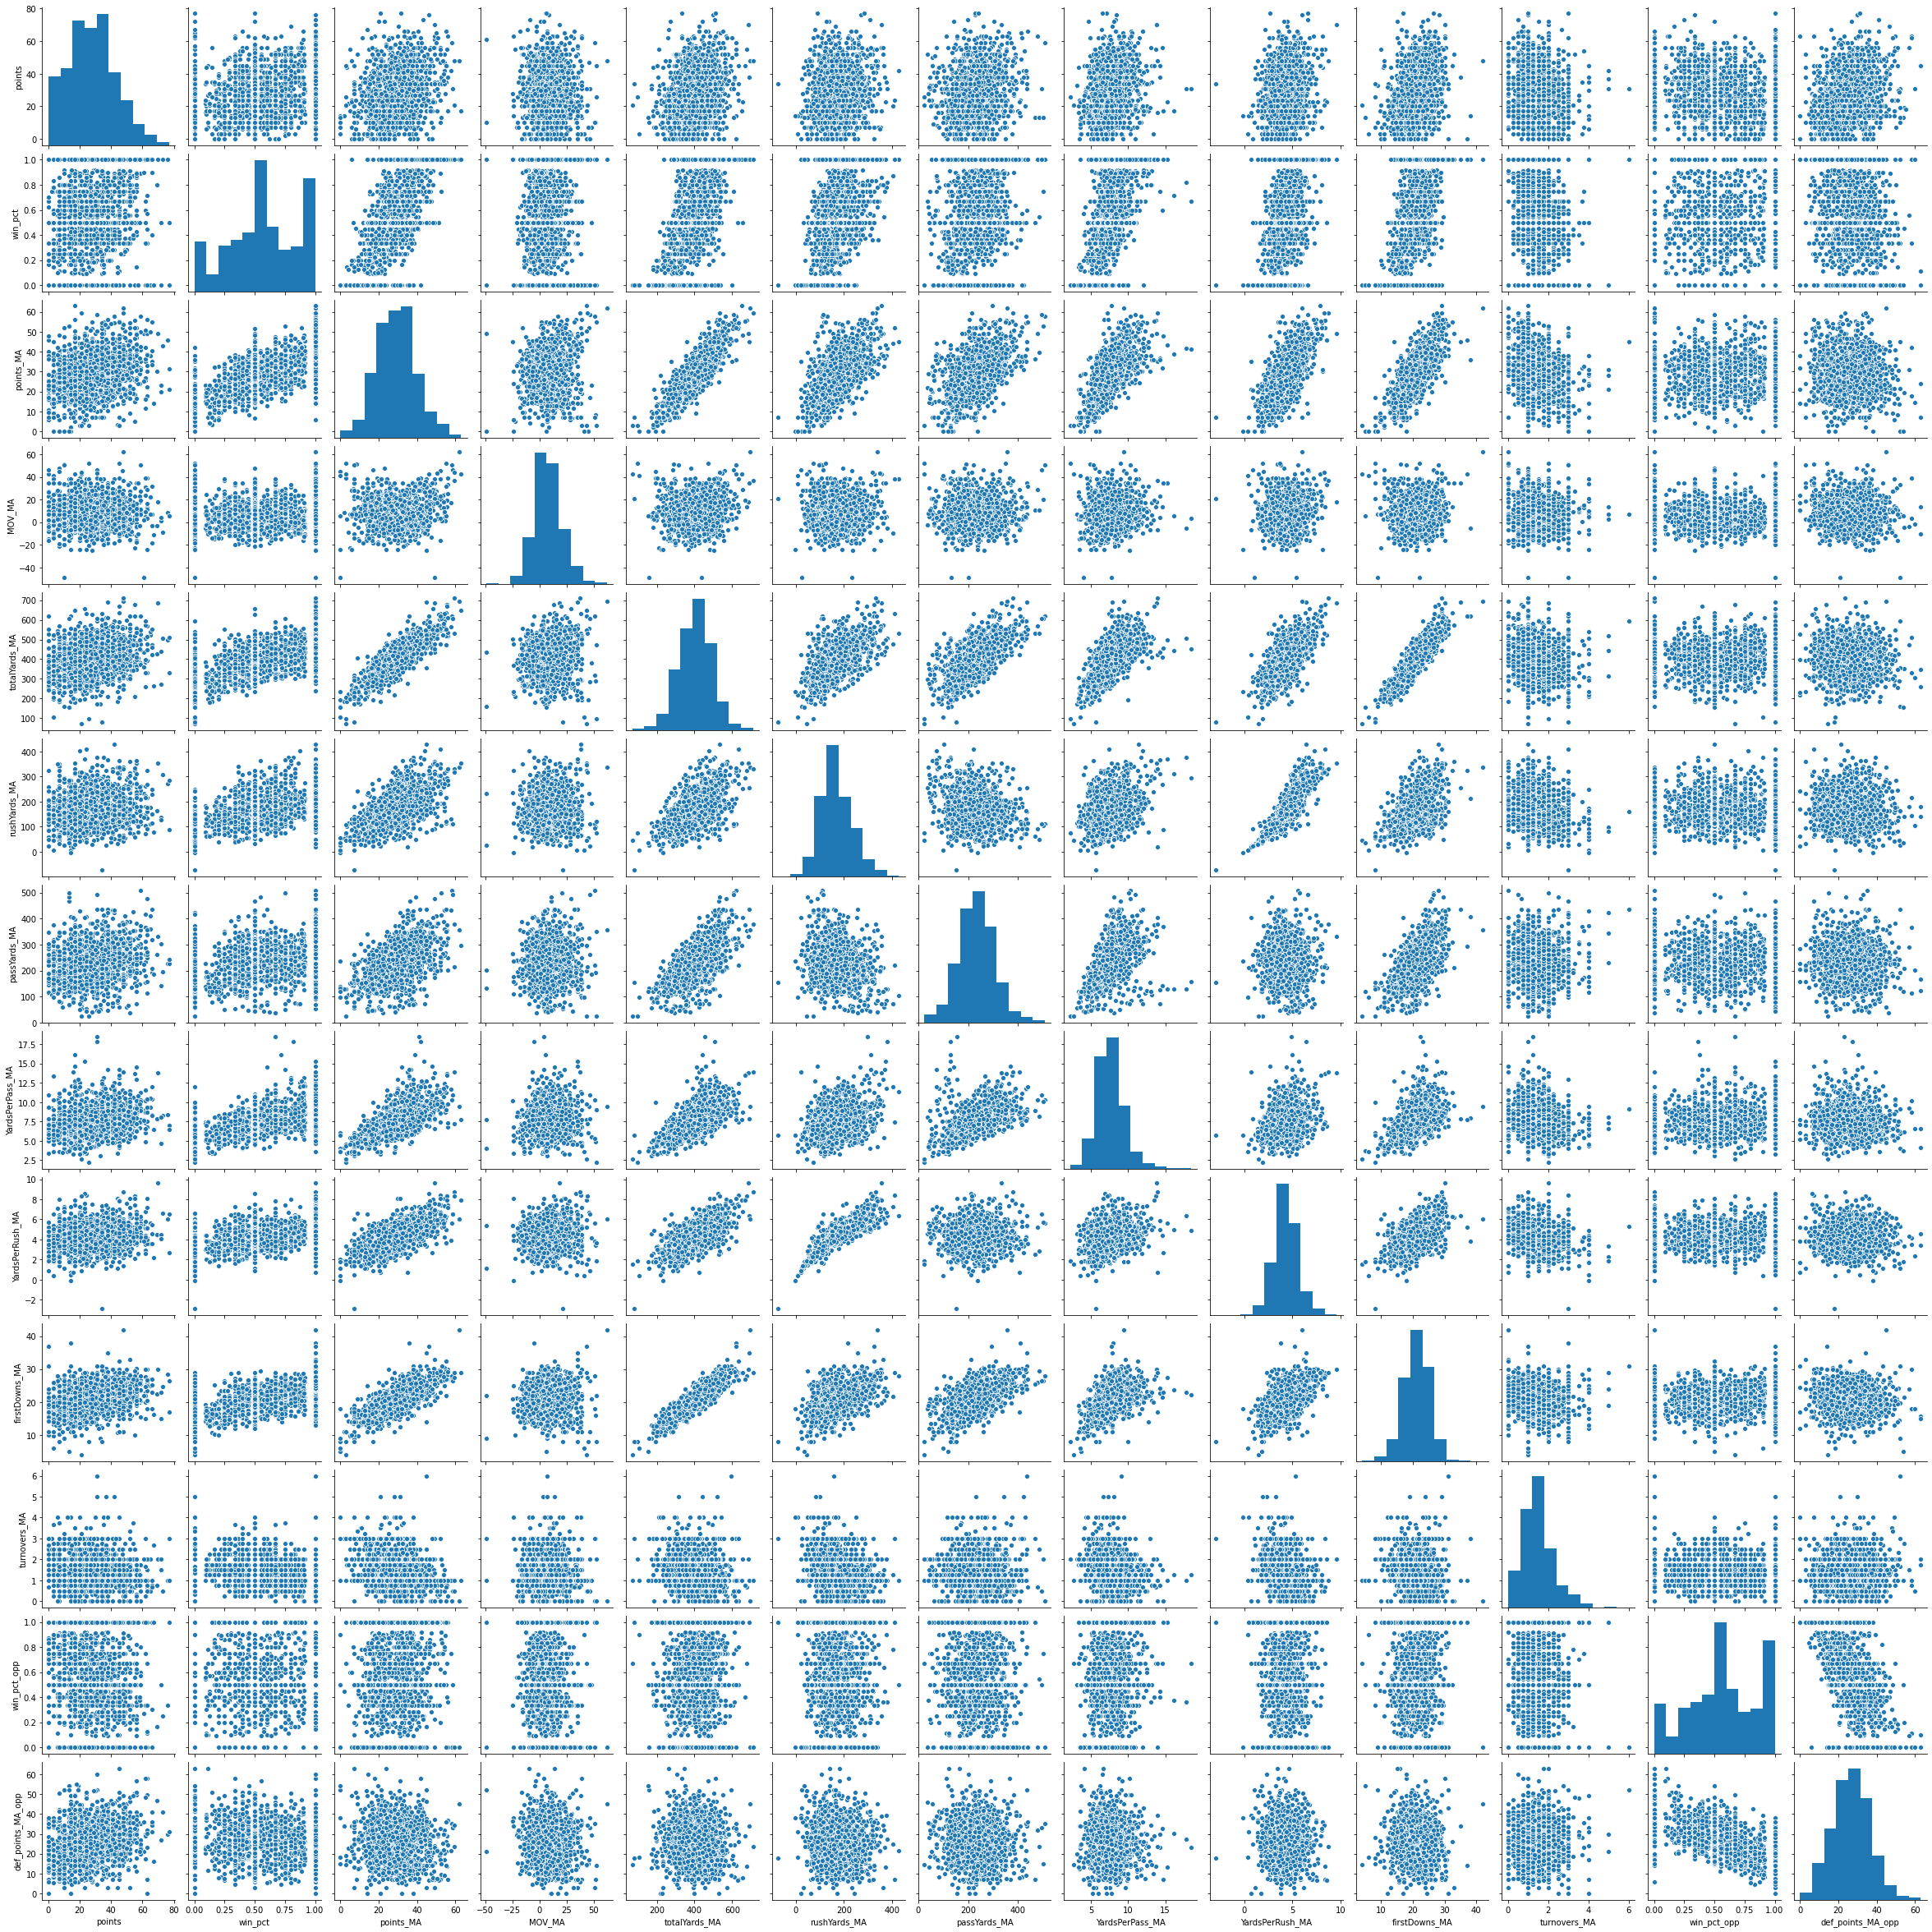

In [32]:
import seaborn as sns
sns.pairplot(small[['points','win_pct','points_MA','MOV_MA','totalYards_MA','rushYards_MA',
                 'passYards_MA','YardsPerPass_MA','YardsPerRush_MA','firstDowns_MA','turnovers_MA',
                'win_pct_opp','def_points_MA_opp']])

In [23]:
# small.info()
small = small.dropna()
small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 1 to 1632
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   week                     1092 non-null   int64  
 1   points                   1092 non-null   int64  
 2   spread                   1092 non-null   float64
 3   overUnder                1092 non-null   float64
 4   outcome                  1092 non-null   int64  
 5   home                     1092 non-null   int64  
 6   win_pct                  1092 non-null   float64
 7   points_MA                1092 non-null   float64
 8   MOV_MA                   1092 non-null   float64
 9   totalYards_MA            1092 non-null   float64
 10  rushYards_MA             1092 non-null   float64
 11  passYards_MA             1092 non-null   float64
 12  YardsPerPass_MA          1092 non-null   float64
 13  YardsPerRush_MA          1092 non-null   float64
 14  firstDowns_MA           

<b>Calculate Home Score

In [24]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


train, test = train_test_split(small, test_size=0.3, random_state=42)

print(small.shape);print(train.shape);print(test.shape)

(1092, 45)
(764, 45)
(328, 45)


In [25]:
X_train=train[['points_MA','MOV_MA','totalYards_MA','rushYards_MA',
                 'passYards_MA','YardsPerPass_MA','YardsPerRush_MA','firstDowns_MA','turnovers_MA',
                'win_pct_opp','def_points_MA_opp','def_MOV_MA_opp','def_totalYards_MA_opp','def_rushYards_MA_opp',
                 'def_passYards_MA_opp','def_YardsPerPass_MA_opp','def_YardsPerRush_MA_opp','def_firstDowns_MA_opp',
                 'def_turnovers_MA_opp']].values

y_train=train['points'].values

In [26]:
X_test=test[['points_MA','MOV_MA','totalYards_MA','rushYards_MA',
                 'passYards_MA','YardsPerPass_MA','YardsPerRush_MA','firstDowns_MA','turnovers_MA',
                'win_pct_opp','def_points_MA_opp','def_MOV_MA_opp','def_totalYards_MA_opp','def_rushYards_MA_opp',
                 'def_passYards_MA_opp','def_YardsPerPass_MA_opp','def_YardsPerRush_MA_opp','def_firstDowns_MA_opp',
                 'def_turnovers_MA_opp']].values

y_test=test['points'].values

In [133]:
print(X_train.shape); print(X_test.shape)

(764, 19)
(328, 19)


In [136]:
regr = MLPRegressor(random_state=42,hidden_layer_sizes = [200,100], max_iter=500, activation='tanh')
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.023782730116231

In [27]:
regr = MLPRegressor(random_state=42,hidden_layer_sizes = [100,200,100,100,100], max_iter=500, activation='relu')
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.031559975974864374

In [29]:
regr = MLPRegressor(random_state=42,hidden_layer_sizes = [200,200,100,100,100], max_iter=500, activation='relu')
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.14580506391704195

In [33]:
blah=test[['spread','outcome','overUnder']].reset_index()
home_score=regr.predict(X_test)
home=pd.DataFrame(home_score, columns=['score_pred'])
home['points']=pd.DataFrame(y_test)
home['spread']=blah['spread']
home['spread']=blah['spread']
home['outcome']=blah['outcome']
home['overUnder']=blah['overUnder']
home

,score_pred,points,spread,outcome,overUnder
0,26.964566,24,-4.0,-14,58.0
1,34.863481,52,-5.5,-35,71.5
2,24.299087,6,-9.5,18,54.5
3,26.114342,51,6.0,24,62.5
4,30.426138,17,2.5,-19,60.5
...,...,...,...,...,...
323,30.472786,16,-1.5,10,46.5
324,25.708029,24,-7.0,-6,51.5
325,34.308284,30,-7.0,-3,42.5
326,28.583092,40,-7.5,-2,78.5


<b>Calculate Away Score

In [34]:
X_train=train[['points_MA_opp','MOV_MA_opp','totalYards_MA_opp','rushYards_MA_opp',
                 'passYards_MA_opp','YardsPerPass_MA_opp','YardsPerRush_MA_opp','firstDowns_MA_opp','turnovers_MA_opp',
                'win_pct','def_points_MA','def_MOV_MA','def_totalYards_MA','def_rushYards_MA',
                 'def_passYards_MA','def_YardsPerPass_MA','def_YardsPerRush_MA','def_firstDowns_MA',
                 'def_turnovers_MA']]

y_train=train['points_opp'].values

X_test=test[['points_MA_opp','MOV_MA_opp','totalYards_MA_opp','rushYards_MA_opp',
                 'passYards_MA_opp','YardsPerPass_MA_opp','YardsPerRush_MA_opp','firstDowns_MA_opp','turnovers_MA_opp',
                'win_pct','def_points_MA','def_MOV_MA','def_totalYards_MA','def_rushYards_MA',
                 'def_passYards_MA','def_YardsPerPass_MA','def_YardsPerRush_MA','def_firstDowns_MA',
                 'def_turnovers_MA']]

y_test=test['points_opp'].values

In [35]:
print(X_train.shape); print(X_test.shape)

(764, 19)
(328, 19)


In [162]:
regr = MLPRegressor(random_state=42,hidden_layer_sizes = [100,200,100,100,100], max_iter=500, activation='relu')
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

-0.008540560497941607

In [36]:
regr = MLPRegressor(random_state=42,hidden_layer_sizes = [200,200,100,100,100], max_iter=500, activation='relu')
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.0846715206483667

In [37]:
away_score=regr.predict(X_test)
away=pd.DataFrame(away_score, columns=['score_pred'])
away['points']=pd.DataFrame(y_test)
away

,score_pred,points
0,35.087837,10
1,33.051909,17
2,21.725980,24
3,37.498241,27
4,31.700041,36
...,...,...
323,20.094783,26
324,31.416955,18
325,34.206704,27
326,47.031743,42


In [44]:
home['away_pred']=away['score_pred']
home['away_points']=away['points']
home['outcome_pred']=home['away_pred']-home['score_pred']
home['total_pred']=home['away_pred']+home['score_pred']
home['total_actual']=home['points']+home['away_points']
home['bet']=np.where(home['outcome_pred']<home['spread'],'home','away')
home['winner']=np.where(home['outcome']<home['spread'],'home','away')
home['winner']=np.where(home['bet']==home['winner'],1,0)
home['outright_pred']=np.where(home['outcome_pred']<0,'home','away')
home['outright_winner']=np.where(home['outcome']<0,'home','away')
home['outright_result']=np.where(home['outright_pred']==home['outright_winner'],1,0)
home['total_bet']=np.where(home['total_pred']>=home['overUnder'],'over','under')
home['total_winner']=np.where(home['total_actual']>=home['overUnder'],'over','under')
home['total_result']=np.where(home['total_bet']==home['total_winner'],1,0)
home

,score_pred,points,spread,outcome,overUnder,away_pred,away_points,outcome_pred,bet,winner,outright_pred,outright_winner,outright_result,total_pred,total_actual,total_winner,total_result,total_pred2,total_bet
0,26.964566,24,-4.0,-14,58.0,35.087837,10,8.123271,away,0,away,home,0,62.052404,34,under,0,over,over
1,34.863481,52,-5.5,-35,71.5,33.051909,17,-1.811572,away,0,home,home,1,67.915390,69,under,1,under,under
2,24.299087,6,-9.5,18,54.5,21.725980,24,-2.573107,away,1,home,away,0,46.025067,30,under,1,under,under
3,26.114342,51,6.0,24,62.5,37.498241,27,11.383898,away,1,away,away,1,63.612583,78,over,1,over,over
4,30.426138,17,2.5,-19,60.5,31.700041,36,1.273903,home,1,away,home,0,62.126179,53,under,0,over,over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,30.472786,16,-1.5,10,46.5,20.094783,26,-10.378004,home,0,home,away,0,50.567569,42,under,0,over,over
324,25.708029,24,-7.0,-6,51.5,31.416955,18,5.708927,away,1,away,home,0,57.124984,42,under,0,over,over
325,34.308284,30,-7.0,-3,42.5,34.206704,27,-0.101580,away,1,home,home,1,68.514988,57,over,1,over,over
326,28.583092,40,-7.5,-2,78.5,47.031743,42,18.448651,away,1,away,home,0,75.614835,82,over,0,under,under


In [47]:
outright_win=home['outright_result'].sum()/len(home)
spread_win=home['winner'].sum()/len(home)
total_win=home['total_result'].sum()/len(home)


print(f'Outright:{outright_win}\nSpread: {spread_win}\nTotal:{total_win}')

Outright:0.49390243902439024
Spread: 0.5213414634146342
Total:0.5396341463414634


In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(Dense(500, input_dim=19, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [49]:
X_train=train[['points_MA','MOV_MA','totalYards_MA','rushYards_MA',
                 'passYards_MA','YardsPerPass_MA','YardsPerRush_MA','firstDowns_MA','turnovers_MA',
                'win_pct_opp','def_points_MA_opp','def_MOV_MA_opp','def_totalYards_MA_opp','def_rushYards_MA_opp',
                 'def_passYards_MA_opp','def_YardsPerPass_MA_opp','def_YardsPerRush_MA_opp','def_firstDowns_MA_opp',
                 'def_turnovers_MA_opp']].values

y_train=train['points'].values

X_test=test[['points_MA','MOV_MA','totalYards_MA','rushYards_MA',
                 'passYards_MA','YardsPerPass_MA','YardsPerRush_MA','firstDowns_MA','turnovers_MA',
                'win_pct_opp','def_points_MA_opp','def_MOV_MA_opp','def_totalYards_MA_opp','def_rushYards_MA_opp',
                 'def_passYards_MA_opp','def_YardsPerPass_MA_opp','def_YardsPerRush_MA_opp','def_firstDowns_MA_opp',
                 'def_turnovers_MA_opp']].values

y_test=test['points'].values

In [50]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
24/24 [==============================] - 0s 961us/step - loss: 2544.3982 - mean_squared_error: 2544.3982
Epoch 2/20
24/24 [==============================] - 0s 823us/step - loss: 199.1067 - mean_squared_error: 199.1067
Epoch 3/20
24/24 [==============================] - 0s 870us/step - loss: 172.8003 - mean_squared_error: 172.8003
Epoch 4/20
24/24 [==============================] - 0s 957us/step - loss: 161.2134 - mean_squared_error: 161.2134
Epoch 5/20
24/24 [==============================] - 0s 867us/step - loss: 142.2397 - mean_squared_error: 142.2397
Epoch 6/20
24/24 [==============================] - 0s 857us/step - loss: 146.5499 - mean_squared_error: 146.5499
Epoch 7/20
24/24 [==============================] - 0s 940us/step - loss: 159.8707 - mean_squared_error: 159.8707
Epoch 8/20
24/24 [==============================] - 0s 876us/step - loss: 143.7140 - mean_squared_error: 143.7140
Epoch 9/20
24/24 [==============================] - 0s 856us/step - loss: 153.7123 - m

In [51]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

11.997139519162312
13.382832894885022


In [52]:
blah=test[['spread','outcome','overUnder']].reset_index()
home_score=model.predict(X_test)
home=pd.DataFrame(home_score, columns=['score_pred'])
home['points']=pd.DataFrame(y_test)
home['spread']=blah['spread']
home['outcome']=blah['outcome']
home['overUnder']=blah['overUnder']
home

,score_pred,points,spread,outcome,overUnder
0,28.994247,24,-4.0,-14,58.0
1,35.992180,52,-5.5,-35,71.5
2,31.559900,6,-9.5,18,54.5
3,28.306913,51,6.0,24,62.5
4,29.723038,17,2.5,-19,60.5
...,...,...,...,...,...
323,31.114731,16,-1.5,10,46.5
324,27.813116,24,-7.0,-6,51.5
325,31.377750,30,-7.0,-3,42.5
326,35.101536,40,-7.5,-2,78.5


In [53]:
X_train=train[['points_MA_opp','MOV_MA_opp','totalYards_MA_opp','rushYards_MA_opp',
                 'passYards_MA_opp','YardsPerPass_MA_opp','YardsPerRush_MA_opp','firstDowns_MA_opp','turnovers_MA_opp',
                'win_pct','def_points_MA','def_MOV_MA','def_totalYards_MA','def_rushYards_MA',
                 'def_passYards_MA','def_YardsPerPass_MA','def_YardsPerRush_MA','def_firstDowns_MA',
                 'def_turnovers_MA']]

y_train=train['points_opp'].values

X_test=test[['points_MA_opp','MOV_MA_opp','totalYards_MA_opp','rushYards_MA_opp',
                 'passYards_MA_opp','YardsPerPass_MA_opp','YardsPerRush_MA_opp','firstDowns_MA_opp','turnovers_MA_opp',
                'win_pct','def_points_MA','def_MOV_MA','def_totalYards_MA','def_rushYards_MA',
                 'def_passYards_MA','def_YardsPerPass_MA','def_YardsPerRush_MA','def_firstDowns_MA',
                 'def_turnovers_MA']]

y_test=test['points_opp'].values

In [54]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
24/24 [==============================] - 0s 941us/step - loss: 281.6759 - mean_squared_error: 281.6759
Epoch 2/20
24/24 [==============================] - 0s 870us/step - loss: 173.8952 - mean_squared_error: 173.8952
Epoch 3/20
24/24 [==============================] - 0s 913us/step - loss: 171.1935 - mean_squared_error: 171.1935
Epoch 4/20
24/24 [==============================] - 0s 913us/step - loss: 152.0402 - mean_squared_error: 152.0402
Epoch 5/20
24/24 [==============================] - 0s 870us/step - loss: 148.1792 - mean_squared_error: 148.1792
Epoch 6/20
24/24 [==============================] - 0s 913us/step - loss: 156.5828 - mean_squared_error: 156.5828
Epoch 7/20
24/24 [==============================] - 0s 913us/step - loss: 160.5854 - mean_squared_error: 160.5854
Epoch 8/20
24/24 [==============================] - 0s 913us/step - loss: 156.5833 - mean_squared_error: 156.5833
Epoch 9/20
24/24 [==============================] - 0s 843us/step - loss: 165.7789 - mea

In [55]:
away_score=regr.predict(X_test)
away=pd.DataFrame(away_score, columns=['score_pred'])
away['points']=pd.DataFrame(y_test)
away

,score_pred,points
0,35.087837,10
1,33.051909,17
2,21.725980,24
3,37.498241,27
4,31.700041,36
...,...,...
323,20.094783,26
324,31.416955,18
325,34.206704,27
326,47.031743,42


In [59]:
home['away_pred']=away['score_pred']
home['away_points']=away['points']
home['outcome_pred']=home['away_pred']-home['score_pred']
home['total_pred']=home['away_pred']+home['score_pred']
home['total_actual']=home['points']+home['away_points']
home['bet']=np.where(home['outcome_pred']<home['spread'],'home','away')
home['winner']=np.where(home['outcome']<home['spread'],'home','away')
home['winner']=np.where(home['bet']==home['winner'],1,0)
home['outright_pred']=np.where(home['outcome_pred']<0,'home','away')
home['outright_winner']=np.where(home['outcome']<0,'home','away')
home['outright_result']=np.where(home['outright_pred']==home['outright_winner'],1,0)
home['total_bet']=np.where(home['total_pred']>=home['overUnder'],'over','under')
home['total_winner']=np.where(home['total_actual']>=home['overUnder'],'over','under')
home['total_result']=np.where(home['total_bet']==home['total_winner'],1,0)
home

,score_pred,points,spread,outcome,overUnder,away_pred,away_points,outcome_pred,total_pred,total_actual,bet,winner,outright_pred,outright_winner,outright_result,total_bet,total_winner,total_result
0,28.994247,24,-4.0,-14,58.0,35.087837,10,6.093590,64.082085,34,away,0,away,home,0,over,under,0
1,35.992180,52,-5.5,-35,71.5,33.051909,17,-2.940271,69.044089,69,away,0,home,home,1,under,under,1
2,31.559900,6,-9.5,18,54.5,21.725980,24,-9.833920,53.285880,30,home,0,home,away,0,under,under,1
3,28.306913,51,6.0,24,62.5,37.498241,27,9.191327,65.805154,78,away,1,away,away,1,over,over,1
4,29.723038,17,2.5,-19,60.5,31.700041,36,1.977003,61.423079,53,home,1,away,home,0,over,under,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,31.114731,16,-1.5,10,46.5,20.094783,26,-11.019948,51.209514,42,home,0,home,away,0,over,under,0
324,27.813116,24,-7.0,-6,51.5,31.416955,18,3.603839,59.230071,42,away,1,away,home,0,over,under,0
325,31.377750,30,-7.0,-3,42.5,34.206704,27,2.828954,65.584454,57,away,1,away,home,0,over,over,1
326,35.101536,40,-7.5,-2,78.5,47.031743,42,11.930207,82.133279,82,away,1,away,home,0,over,over,1


In [60]:
outright_win=home['outright_result'].sum()/len(home)
spread_win=home['winner'].sum()/len(home)
total_win=home['total_result'].sum()/len(home)


print(f'Outright:{outright_win}\nSpread: {spread_win}\nTotal:{total_win}')

Outright:0.4847560975609756
Spread: 0.5213414634146342
Total:0.5457317073170732


In [61]:
home.groupby('total_winner').count()

,score_pred,points,spread,outcome,overUnder,away_pred,away_points,outcome_pred,total_pred,total_actual,bet,winner,outright_pred,outright_winner,outright_result,total_bet,total_result
total_winner,,,,,,,,,,,,,,,,,
over,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162,162
under,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166,166


<b><b>Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
X=np.array(please[['home_yards','home_rushYards','home_passYards','home_yardsPerPass','home_yardsPerRush','home_talent','week']])
# X=X.reshape(-1,1)
y=np.array(please['home_points'])
home_reg = LinearRegression().fit(X, y)
home_reg.score(X, y)

0.06737425917444706

In [29]:
please.to_csv(index=False)

"id,week,home_team,home_conference,home_points,away_team,away_conference,away_points,home_talent,away_talent,spread,home_yards,home_rushYards,home_passYards,home_yardsPerPass,home_yardsPerRush,away_yards,away_passYards,away_rushYards,away_yardsPerPass,away_yardsPerRush\r\n401110723,1,Florida,SEC,24,Miami,ACC,20,835,815.12,-7.0,304,50,254,9.4,1.8,301,87,214,7.1,2.4\r\n401112497,10,Florida State,ACC,10,Miami,ACC,27,878,815.12,-3.0,426,99,327,9.6,3.5,301,87,214,7.1,2.4\r\n401112443,2,North Carolina,ACC,28,Miami,ACC,25,697,815.12,5.0,483,238,245,10.2,4.6,301,87,214,7.1,2.4\r\n401112494,9,Pittsburgh,ACC,12,Miami,ACC,16,637,815.12,-4.5,263,78,185,4.5,2.6,301,87,214,7.1,2.4\r\n401112523,14,Duke,ACC,27,Miami,ACC,17,633,815.12,9.5,204,107,97,4.4,3.3,301,87,214,7.1,2.4\r\n401112517,13,Florida International,Conference USA,30,Miami,ACC,24,532,815.12,21.0,267,59,208,6.1,2.3,301,87,214,7.1,2.4\r\n401110799,4,Florida,SEC,34,Tennessee,SEC,3,835,830.34,-13.5,304,50,254,9.4,1.8,404,93,311,7.8,3.0\r\n401

In [33]:
path=r'C:/Users/loosm/DSC-630 Predictive Analytics/Term Project/stats.csv'
please.to_csv(path,index=False)

<b>Trying to utilize moving average

In [34]:
please

,id,week,home_team,home_conference,home_points,away_team,away_conference,away_points,home_talent,away_talent,...,home_yards,home_rushYards,home_passYards,home_yardsPerPass,home_yardsPerRush,away_yards,away_passYards,away_rushYards,away_yardsPerPass,away_yardsPerRush
0,401110723,1,Florida,SEC,24,Miami,ACC,20,835,815.12,...,304,50,254,9.4,1.8,301,87,214,7.1,2.4
1,401112497,10,Florida State,ACC,10,Miami,ACC,27,878,815.12,...,426,99,327,9.6,3.5,301,87,214,7.1,2.4
2,401112443,2,North Carolina,ACC,28,Miami,ACC,25,697,815.12,...,483,238,245,10.2,4.6,301,87,214,7.1,2.4
3,401112494,9,Pittsburgh,ACC,12,Miami,ACC,16,637,815.12,...,263,78,185,4.5,2.6,301,87,214,7.1,2.4
4,401112523,14,Duke,ACC,27,Miami,ACC,17,633,815.12,...,204,107,97,4.4,3.3,301,87,214,7.1,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,401117551,13,Fresno State,Mountain West,28,Nevada,Mountain West,35,482,461.96,...,462,206,256,6.6,5.2,404,109,295,5.7,4.4
799,401110854,12,Vanderbilt,SEC,14,Kentucky,SEC,38,605,672.74,...,225,116,109,3.4,3.9,422,176,246,9.5,4.5
800,401110810,5,South Carolina,SEC,24,Kentucky,SEC,7,762,672.74,...,270,128,142,4.7,4.1,422,176,246,9.5,4.5
801,401110802,4,Mississippi State,SEC,28,Kentucky,SEC,13,732,672.74,...,497,261,236,7.9,6.5,422,176,246,9.5,4.5
